In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *

發現目標!共軍在前方57米處,請準備砲擊!)


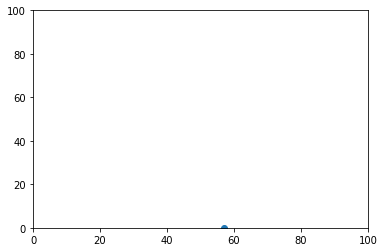

當前順風9m/s
*砲彈質量為1公斤*
速度(m/s)>>20
仰角(°)>>50
擊中目標!
國家感謝你的協助!


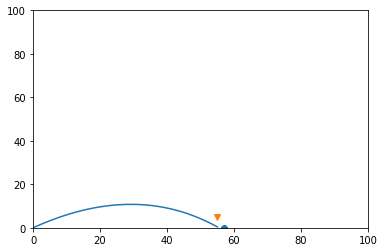

In [3]:
p = np.random.randint(50,100)
q = 0
print('發現目標!共軍在前方{}米處,請準備砲擊!)'.format(p))
plt.axis([0, 100, 0, 100])
plt.scatter(p,q)
plt.show()
k=0
g = 9.8
while k == 0 :
    s = np.random.randint(-10,10)
    D = 1.2*1.2*0.15/2 #D=PCA/2
    if s < 0:
        print('當前逆風{}m/s'.format(s))
    elif s > 0:
        print('當前順風{}m/s'.format(s))
    else:
        print('當前無風')
    print('*砲彈質量為1公斤*')
    m = 1
    t=symbols('t')
    vxt = symbols('vxt')
    vyt = symbols('vyt')
    v=float(input('速度(m/s)>>'))
    ϕ=float(input('仰角(°)>>'))  
    θ=(ϕ*np.pi)/180
    
    vy=v*np.sin(θ) 
    vx=v*np.cos(θ) + s
    Y=[0]
    X=[0]
    
    for i in range(0,100000):
        x=X[i] + vx*0.001
        y=Y[i] + vy*0.001
        if ((x-p)**2) + (y-q)**2 < 4:
            k = 1
            break
        elif y < 0:
            break
        X.append(x)
        Y.append(y)
        i = i*0.001
        vx = vx - D*vx/m*0.001
        vy = vy - D*vy/m*0.001 -g*0.001 
    plt.plot(X,Y)
    plt.scatter(p,q)
    plt.axis([0, 100, 0, 100])
    if k != 1:
        p = p - np.random.randint(5,11)
        plt.scatter(p,q)
        plt.scatter(x,1,marker='X')
        plt.show()
        print('速度是{},仰角{},未命中目標!'.format(v,ϕ))
        print('敵軍向前移動了!現在就在前方{}米\n'.format(p))
        if p < 10:
            print('共軍接近!準備迎擊!')
            k=2
if k ==1:
    plt.scatter(x,5,marker='v')
    print('\033[1;31;47m擊中目標!\n國家感謝你的協助!\033[0m')
else:
    print('遊戲結束')

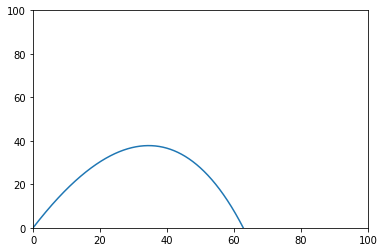

In [60]:
p = np.random.randint(50,100)
q = 0
X = [0]
Y = [0]
vx = 15
vy = 30
D = 1.2*1.2*0.15/2 #D=PCA/2
g = 9.8
m =1
for i in range(0,100000):
    x=X[i] + vx*0.001
    y=Y[i] + vy*0.001
    if ((x-p)**2) + (y-q)**2 < 4:
        k = 1
        break
    elif y < 0:
        break
    X.append(x)
    Y.append(y)
    i = i*0.001
    vx = vx - D*vx/m*0.001
    vy = vy - D*vy/m*0.001 -g*0.001
plt.axis([0, 100, 0, 100])
plt.plot(X,Y)

In [11]:
import ipywidgets as widgets
from IPython.display import display

In [3]:
def Trajectory1(砲彈質量=1,仰角=45.0,速度=10):
    Trajectory1.close
    t=symbols('t')
    θ=(仰角*np.pi)/180.
    
    vy0=速度*np.sin(θ)
    vx0=速度*np.cos(θ)
    vyt = vy0 - 9.8*t
    
    yt = integrate(vyt,t)
    xt = integrate(vx0,t)

    Y=[]
    X=[]
    c=0.01
    a=10
    while c < a:
        x=xt.evalf(subs={t:c})-xt.evalf(subs={t:0})
        y=yt.evalf(subs={t:c})-yt.evalf(subs={t:0})
        Y.append(y)
        X.append(x)
        if ((x-p)**2) + (y-q)**2 < 4:
            k =1
            return k
            break
        elif y < 0:
            break
        else:
            c= c+0.01 
    plt.plot(X,Y)
    plt.scatter(p,q)
    plt.axis([0, 100, 0, 100])
    plt.show()

發現目標!共軍在前方88米處,請準備砲擊!)


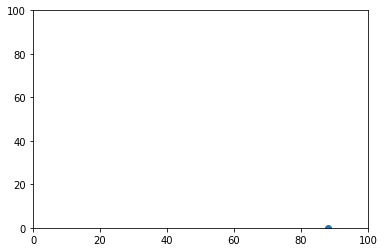

interactive(children=(IntSlider(value=1, description='砲彈質量', max=20, min=1), FloatSlider(value=45.0, descripti…

<function __main__.Trajectory1(砲彈質量=1, 仰角=45.0, 速度=10)>

In [77]:
p = np.random.randint(50,100)
q = 0
print('發現目標!共軍在前方{}米處,請準備砲擊!)'.format(p))
plt.axis([0, 100, 0, 100])
plt.scatter(p,q)
plt.show()
k=0
interact_manual(Trajectory1,砲彈質量=(1,20),仰角=(0,90.),速度=(0,100.))

In [4]:
plt.show()